In [ ]:
"""
Steps to be carried out in Exploratory Data Analysis
a) Understand the data(description)
b) Clean the data
c) Analysis of relationship between variables(using plots)
"""

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [51]:
#load the data 
data = pd.read_csv("/home/ashleymuoki/Downloads/thegef_data(with_dates).csv")

In [52]:
# understanding the data

In [53]:
data.head()

,Title,Funding Institution,Implementing Institution,Country,Region,Status,Total Project Amount,Link to Project Documentation,Start Date,End Date
0,Preparation of Belize’s First Biennial Transpa...,['GEF Trust Fund'],['United Nations Environment Programme'],['Belize'],['Latin America and Caribbean'],Project Approved,1233000,['https://publicpartnershipdata.azureedge.net/...,31 Aug 2023,NaN
1,Development of the Fourth National Communicati...,['GEF Trust Fund'],['United Nations Development Programme'],['Botswana'],['Africa'],Project Approved,1233000,['https://publicpartnershipdata.azureedge.net/...,14 Sep 2023,NaN
2,Elaboration of Combined Third National Communi...,['GEF Trust Fund'],['Food and Agriculture Organization'],['Venezuela'],['Latin America and Caribbean'],Project Approved,632190,['https://publicpartnershipdata.azureedge.net/...,27 Sep 2023,NaN
3,Tunisian First Biennial Transparency Report (B...,['GEF Trust Fund'],['United Nations Development Programme'],['Tunisia'],['Africa'],Project Approved,1233000,['https://publicpartnershipdata.azureedge.net/...,14 Sep 2023,NaN
4,Development of the First Biennial Transparency...,['GEF Trust Fund'],['United Nations Development Programme'],['Armenia'],['Europe and Central Asia'],Project Approved,1233000,['https://publicpartnershipdata.azureedge.net/...,31 Aug 2023,NaN


In [54]:
data.tail()

,Title,Funding Institution,Implementing Institution,Country,Region,Status,Total Project Amount,Link to Project Documentation,Start Date,End Date
2129,Szombathely CHP/Biomass Project,['GEF Trust Fund'],['The World Bank'],['Hungary'],['Europe and Central Asia'],Cancelled,28000000,['https://publicpartnershipdata.azureedge.net/...,NaN,05 Feb 2008
2130,Hydrogen Fuel Cell Buses for Urban Transport,['GEF Trust Fund'],['United Nations Development Programme'],['Brazil'],['Latin America and Caribbean'],Completed,21443000,['https://publicpartnershipdata.azureedge.net/...,20 Dec 2000,07 Dec 2018
2131,Biomass Energy for Rural India,['GEF Trust Fund'],['United Nations Development Programme'],['India'],['Asia'],Completed,8623000,['https://publicpartnershipdata.azureedge.net/...,21 Feb 2001,17 Feb 2015
2132,Second Beijing Environment Project,['GEF Trust Fund'],['The World Bank'],['China'],['Asia'],Completed,1255000000,['https://publicpartnershipdata.azureedge.net/...,31 May 2000,28 Jul 2011
2133,Capacity Building for the Adoption and Applica...,['GEF Trust Fund'],['United Nations Development Programme'],['Regional'],['Regional'],Completed,1249000,['https://publicpartnershipdata.azureedge.net/...,24 Jan 2001,12 Dec 2011


In [55]:
data.shape

(2134, 10)

In [56]:
data.describe()

,Total Project Amount
count,2.134000e+03
mean,4.555798e+07
std,1.337879e+08
min,4.800000e+04
25%,2.465625e+06
50%,1.445869e+07
75%,3.797324e+07
max,3.040516e+09


In [57]:
#check the columns
data.columns

Index(['Title', 'Funding Institution', 'Implementing Institution', 'Country',
       'Region', 'Status', 'Total Project Amount',
       'Link to Project Documentation', 'Start Date', 'End Date'],
      dtype='object')

In [58]:
#check for unique values
data.nunique()

Title                            2001
Funding Institution                 5
Implementing Institution           65
Country                           162
Region                              7
Status                              5
Total Project Amount             1893
Link to Project Documentation    2133
Start Date                       1328
End Date                          826
dtype: int64

In [59]:
#check for a column
data['Funding Institution'].unique()

array(["['GEF Trust Fund']", "['Multi Trust Fund']",
       "['Least Developed Countries Fund']",
       "['Special Climate Change Fund']", "['CBIT Trust Fund']"],
      dtype=object)

In [60]:
#cleaning the data
#check for null values
data.isnull().sum()

Title                               0
Funding Institution                 0
Implementing Institution            0
Country                             0
Region                              0
Status                              0
Total Project Amount                0
Link to Project Documentation       0
Start Date                        149
End Date                         1056
dtype: int64

In [61]:
projects = data.drop(['Start Date', 'End Date','Link to Project Documentation'], axis=1)

In [62]:
projects.head()

,Title,Funding Institution,Implementing Institution,Country,Region,Status,Total Project Amount
0,Preparation of Belize’s First Biennial Transpa...,['GEF Trust Fund'],['United Nations Environment Programme'],['Belize'],['Latin America and Caribbean'],Project Approved,1233000
1,Development of the Fourth National Communicati...,['GEF Trust Fund'],['United Nations Development Programme'],['Botswana'],['Africa'],Project Approved,1233000
2,Elaboration of Combined Third National Communi...,['GEF Trust Fund'],['Food and Agriculture Organization'],['Venezuela'],['Latin America and Caribbean'],Project Approved,632190
3,Tunisian First Biennial Transparency Report (B...,['GEF Trust Fund'],['United Nations Development Programme'],['Tunisia'],['Africa'],Project Approved,1233000
4,Development of the First Biennial Transparency...,['GEF Trust Fund'],['United Nations Development Programme'],['Armenia'],['Europe and Central Asia'],Project Approved,1233000


In [63]:
#relationship analysis
#1 correlation matrix
correlation = projects.corr()

/tmp/ipykernel_5009/2914400835.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = projects.corr()


<Axes: >

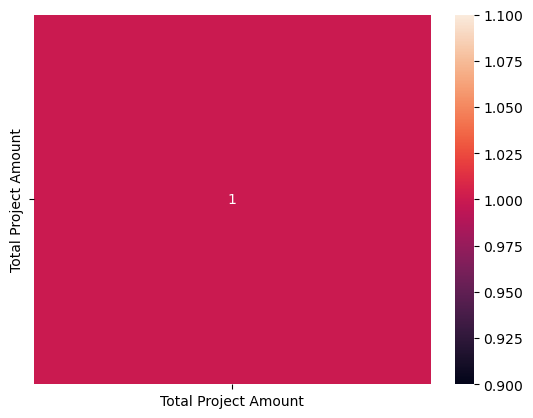

In [64]:
sns.heatmap(correlation, xticklabels= correlation.columns,yticklabels=correlation.columns,annot=True)

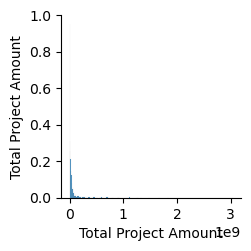

In [81]:
#use pairplot
sns.pairplot(projects)

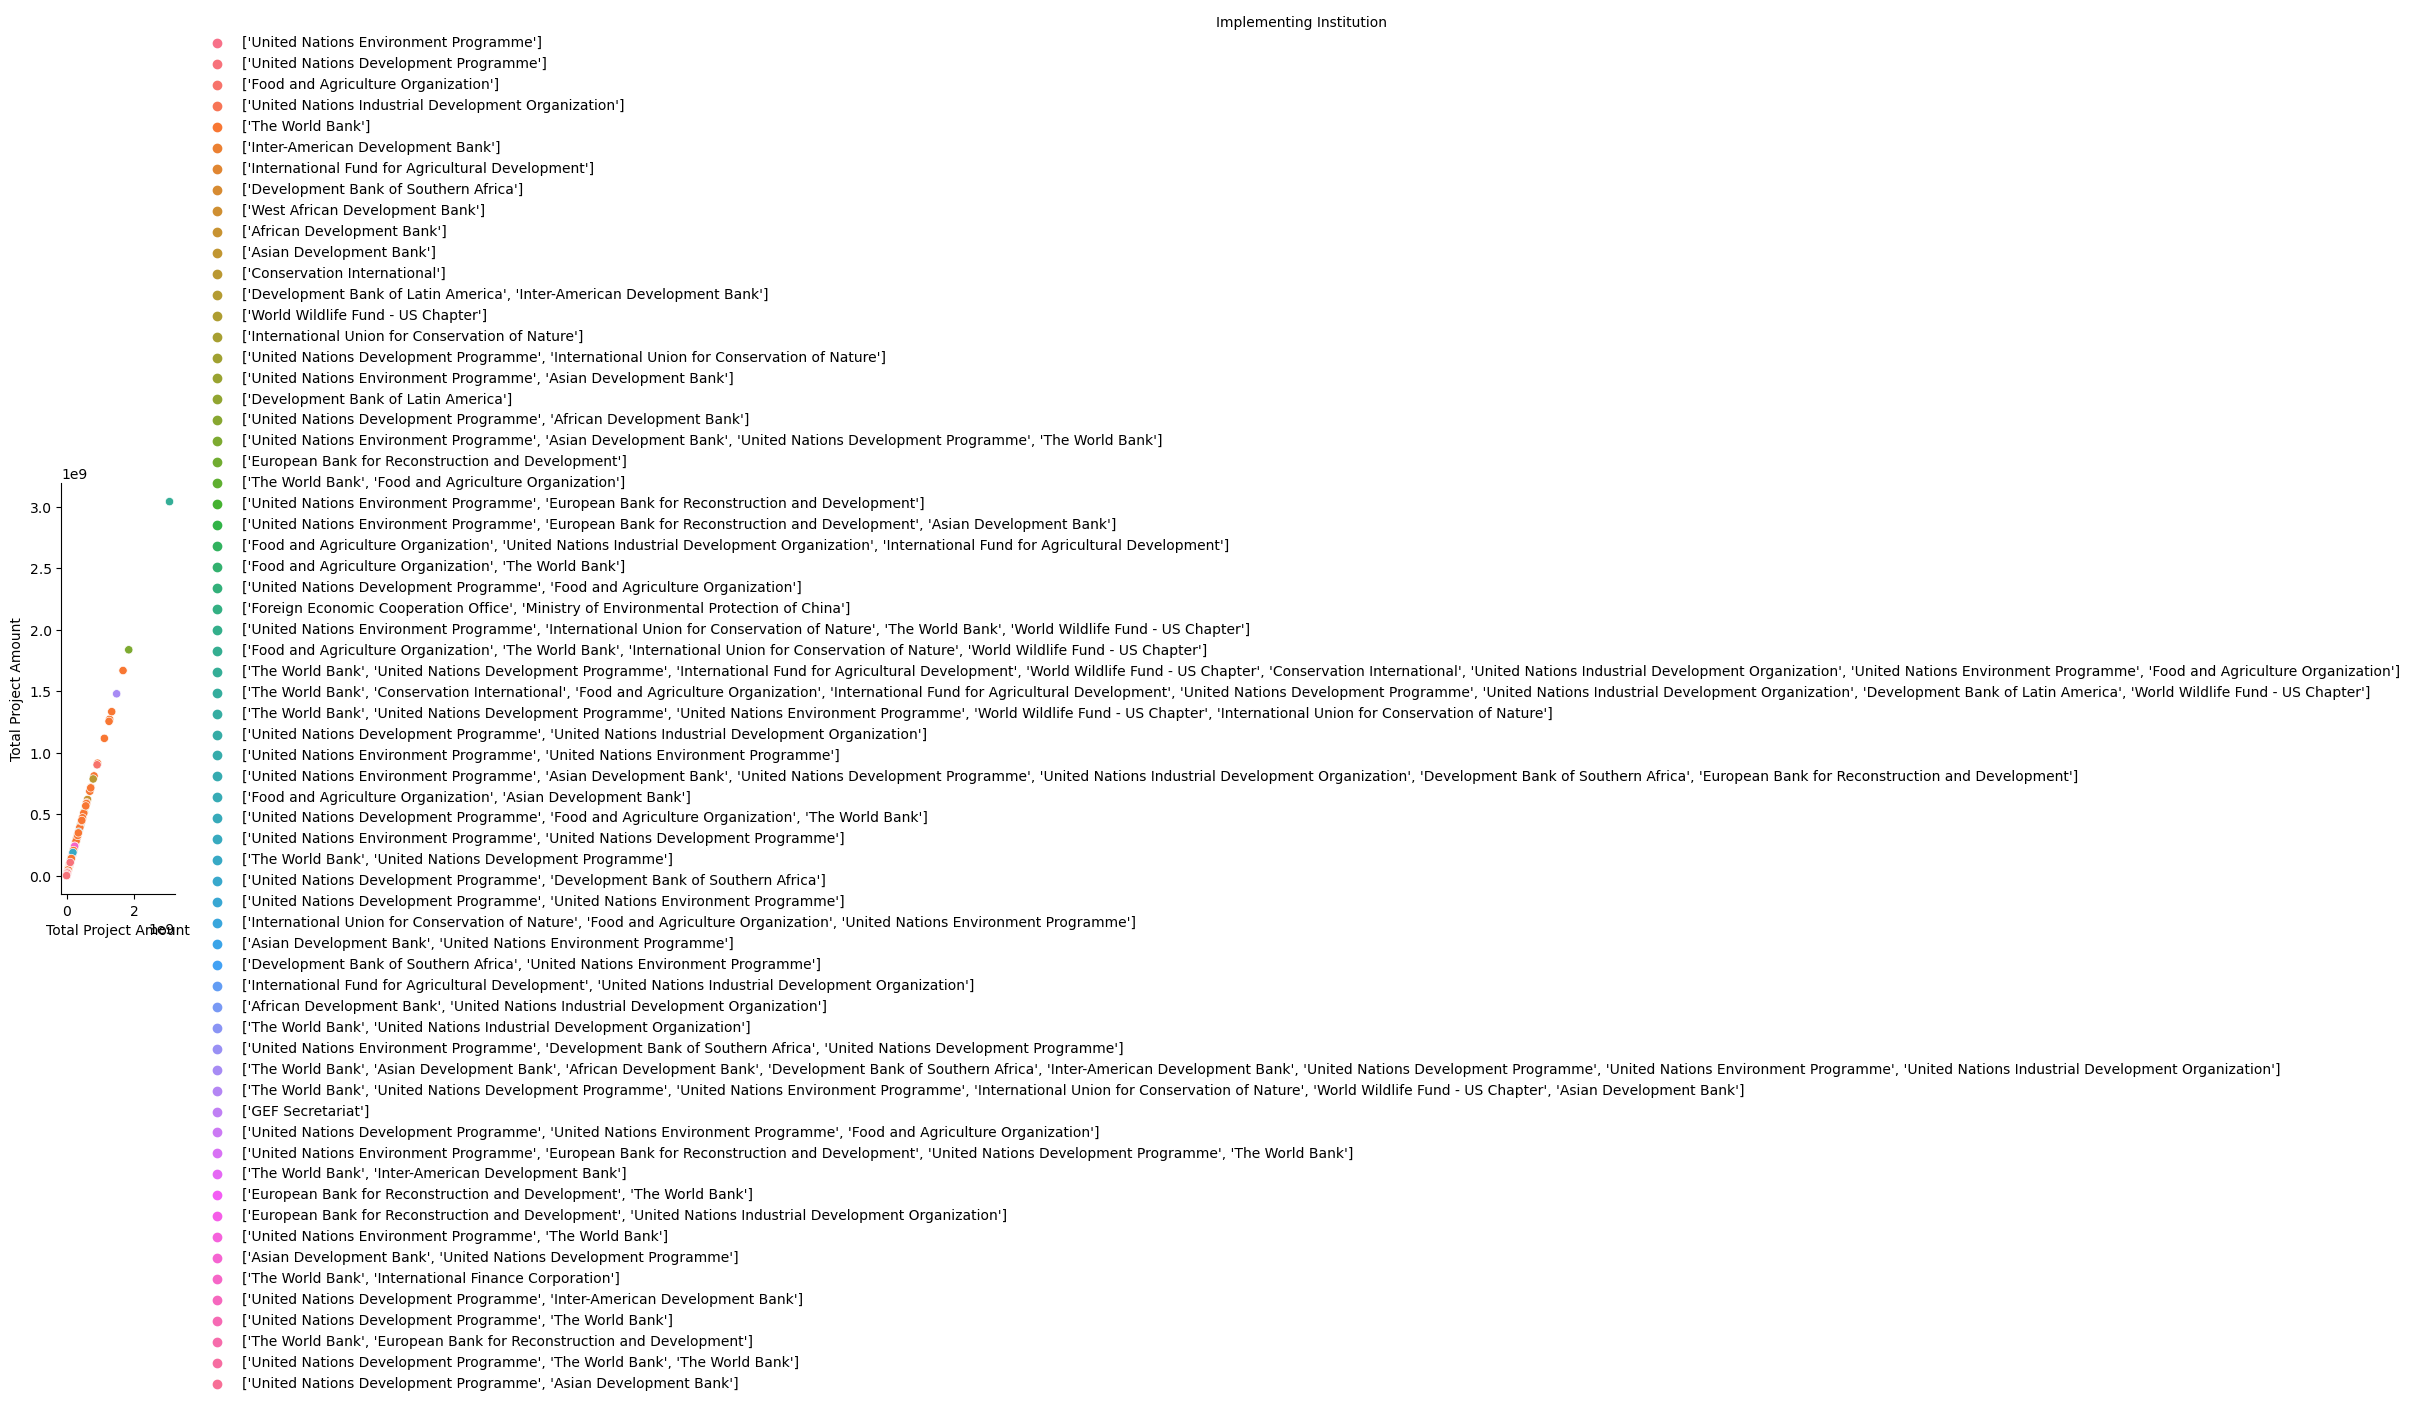

In [67]:
#scatter plot 1
sns.relplot(x='Total Project Amount',y = 'Total Project Amount', hue= 'Implementing Institution',data = projects)

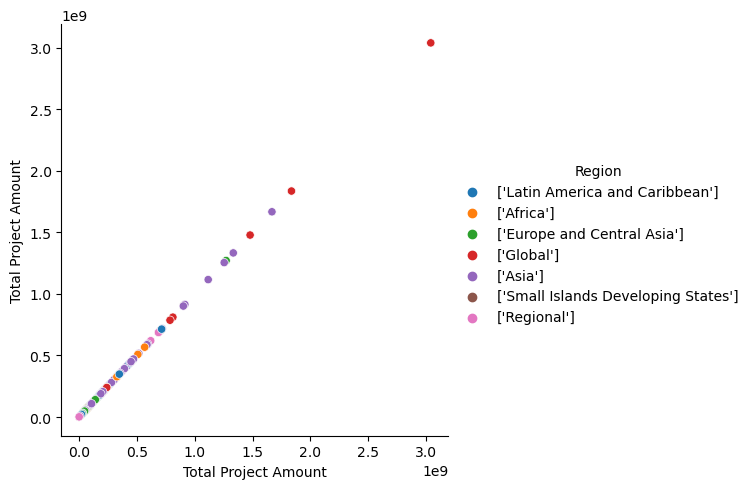

In [68]:
#scatter plot 2
sns.relplot(x='Total Project Amount',y = 'Total Project Amount', hue= 'Region',data = projects)

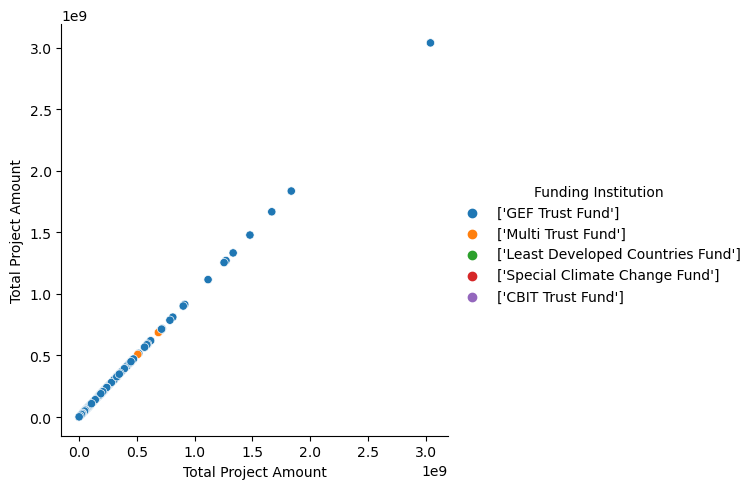

In [79]:
#scatter plot 3
sns.relplot(x='Total Project Amount',y = 'Total Project Amount', hue= 'Funding Institution',data = projects)

<BarContainer object of 2134 artists>

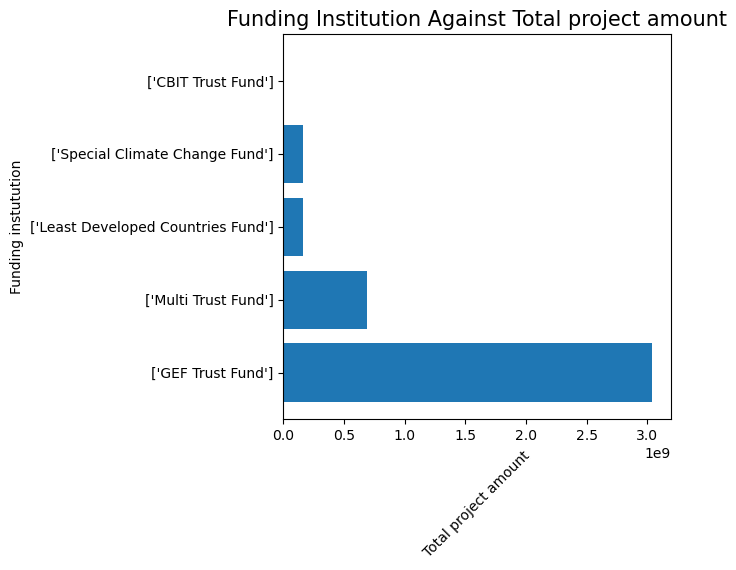

In [83]:
#bar chart 
x = projects['Funding Institution']
y = projects['Total Project Amount']
plt.figure(figsize=(5,5))
plt.title("Funding Institution Against Total project amount", fontsize= 15)
plt.xlabel('Total project amount', fontsize = 10, rotation=45)
plt.ylabel('Funding instutution', fontsize=10)
plt.barh(x,y)

<Axes: xlabel='Total Project Amount', ylabel='Count'>

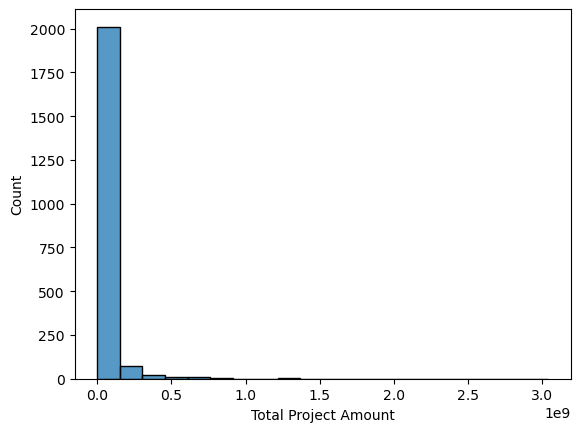

In [86]:
#histogram
sns.histplot(x = 'Total Project Amount', data = projects, bins = 20)